#TUGAS 1

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from pandas import read_csv

In [ ]:
try:
    data_harga = pd.read_csv('data/price.csv')
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    data_harga = pd.read_csv('data/price.csv')

In [ ]:
data_harga

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [ ]:
q1 = data_harga['House_Price'].quantile(0.25)
q3 = data_harga['House_Price'].quantile(0.75)
jarak_q = q3 - q1
print('q1 = ', q1,', q3 = ', q3,', jarak_q = ',jarak_q)
batas_bawah = q1 - 1.5*jarak_q
batas_atas = q3 + 1.5*jarak_q
print('batas_bawah = ',batas_bawah,', batas_atas = ',batas_atas)

q1 =  4661000.0 , q3 =  7187250.0 , jarak_q =  2526250.0
batas_bawah =  871625.0 , batas_atas =  10976625.0


In [ ]:
outliers = data_harga[(data_harga.House_Price<batas_bawah)|(data_harga.House_Price>batas_atas)]
outliers

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,150000000
678,679,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000
811,812,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [ ]:
data_tanpa_outliers = data_harga[(data_harga.House_Price>batas_bawah)&(data_harga.House_Price<batas_atas)]
data_tanpa_outliers

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


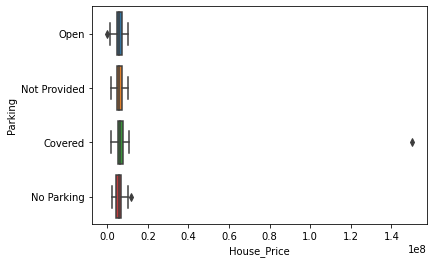

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=data_harga)

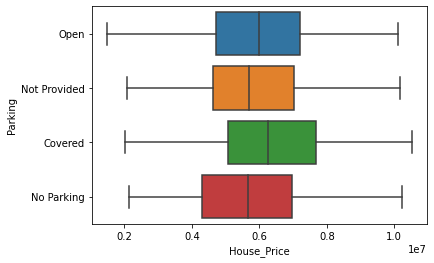

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=data_tanpa_outliers)

#TUGAS 2

**Bagaimana mengeluarkan semua outlier bawah dari BoxPlot?**

In [ ]:
try:
    price = pd.read_csv('data/price.csv')
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    price = pd.read_csv('data/price.csv')

In [ ]:
price

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


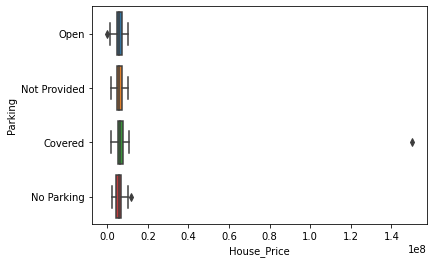

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price) #Terdapat outlier

In [ ]:
Q1 = price['House_Price'].quantile(0.25)
Q3 = price['House_Price'].quantile(0.75)
IQR = Q3 - Q1 #IQR (Inter Quartile Range)
Lower_Extreme = Q1 - 1.5*IQR
Upper_Extreme = Q3 + 1.5*IQR

In [ ]:
#Mengeluarkan outlier bawah 
price2 = price[price.House_Price>Lower_Extreme] #price2 = tanpa outlier bawah

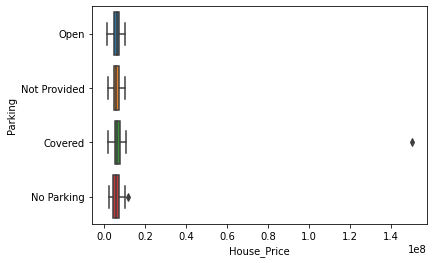

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

#TUGAS 3

**1. Adakah tipe variabel yang kurang tepat di data tersebut?**


Ya, ada. Variabel sex, smoker, day, dan time memiliki tipe variabel object yang mana tidak cocok dengan isi variabelnya yang berupa teks sehingga harus diubah menjadi variabel category.

In [ ]:
import pandas as pd
import scipy, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
path = "sample_data/tips.csv"
tips = pd.read_csv(path)
tips.info()                #terlihat variabel sex, smoker, day, time memiliki tipe object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')
tips.dtypes                 #variabel sex, smoker, day, time telah diubah menjadi tipe category

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

**2. Apakah data numeriknya cenderung berdistribusi normal?**

Tidak, data numeriknya tidak cenderung berdistribusi normal. Kurva dari distribusi normal memiliki ciri, yaitu terdapat satu puncak (uni-modal) dan berbentuk simetris (not skewed). Berdasarkan grafik kurva yang didapat, terlihat bahwa kurva tidak simetris, sehingga dapat disimpulkan bahwa kurba dari data numerik ini tidak berdistribusi normal.

In [ ]:
#Data Numerik
tips_num = tips.select_dtypes(include = ['float64', 'int64'])
tips_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


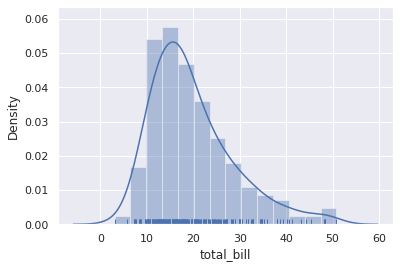

In [ ]:
#Kurva total_bill terlihat tidak simetris (miring kanan)
p = sns.distplot(tips['total_bill'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


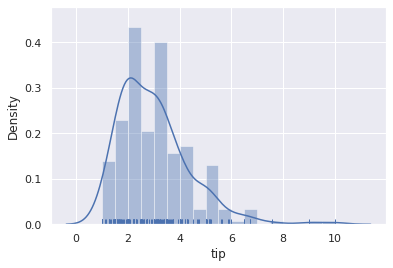

In [ ]:
#Kurva tip tidak simetris dan tidak memiliki lengkung puncak sempurna
q = sns.distplot(tips['tip'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


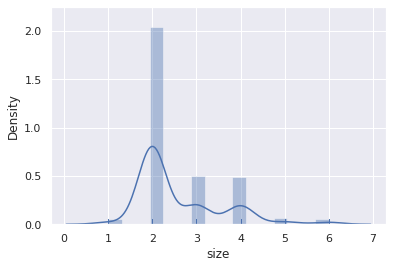

In [ ]:
#Kurva size memiliki banyak puncak
r = sns.distplot(tips['size'], kde=True, rug=True)

**3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?**

Ya, berdasarkan penelusuran ditemukan adanya outlier dan duplikasi data.

*   Noise: Tidak ditemukan noise data (tidak ada nilai minus, dan lainnya)
*   Duplicate: Ditemukan 1 duplikasi data
*   Missing value: Tidak ditemukan missing value (null nya 0)
*   Outlier: Ditemukan adanya outlier data





In [ ]:
#cek noise data
tips.describe(include='all')  #terlihat bahwa tidak ada data noise

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
#cek duplikasi data
print(tips.shape)
tips.duplicated().sum()   #terdapat 1 duplikasi data

(244, 7)


1

In [ ]:
#duplikasi data dihilangkan
tips.drop_duplicates(inplace=True)   
print(tips.duplicated().sum())
print(tips.shape)          #duplikasi data telah dihilangkan

0
(243, 7)


In [ ]:
#cek missing value
print(tips.isnull().sum())   #terlihat bahwa tidak ada missing value (null nya 0)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
#cek outlier (total_bill)
df = np.abs(tips.total_bill - tips.total_bill.mean())<=(2*tips.total_bill.std())
df.head()

tips2 = tips[df]    #tips2 adalah data tanpa outlier
print(tips2.shape, tips.shape)  #terlihat bahwa terdapat outlier (kanan)

(229, 7) (243, 7)


In [ ]:
#cek outlier (tip)
df = np.abs(tips.tip - tips.tip.mean())<=(2*tips.tip.std())
df.head()

tips2 = tips[df]    #tips2 adalah data tanpa outlier
print(tips2.shape, tips.shape)  #terlihat bahwa terdapat outlier (kanan)

(233, 7) (243, 7)


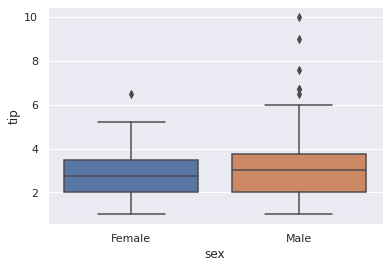

In [ ]:
#cek outlier dengan boxplot
sns.boxplot (x='sex', y='tip', data=tips)  #terlihat bahwa ada outlier atas

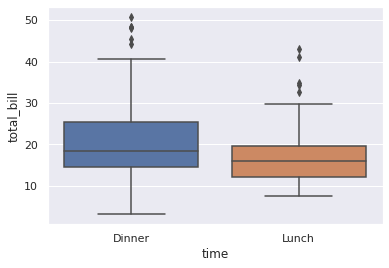

In [ ]:
sns.boxplot (x='time', y='total_bill', data=tips)   #terlihat bahwa ada outlier atas

**4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?**

Apabila dilihat pada data yang diberikan, jumlah pelanggan pria cenderung lebih banyak dibandingkan jumlah pelanggan wanita. Perbandingannya bernilai 64% untuk pelanggan pria dan 36% untuk pelanggan wanita. Maka, dapat disimpulkan bahwa jumlah pelanggan pria dan wanita tidak cenderung proporsional (balance).

**5. Dari data yang ada apakah pria atau wanita ada kecenderungan memberi tips lebih besar?**

Apabila dilihat pada data yang disuguhkan, untuk rata-rata pemberian tips yang diberikan oleh wanita adalah 2,84 USD dan untuk pria adalah 3,09 USD. Dapat disimpulkan bahwa adanya kecenderungan untuk pemberian tips oleh pembeli pria.

**6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?**

Apabila dilihat pada data yang disuguhkan, ditemukan kecenderungan pada hari Sabtu dengan total tips yang diberikan adalah 260,4 USD dan pada hari Minggu sebesar 247,39 USD. Dapat disimpulkan kecenderungan pemberian tips yang lebih besar terjadi pada hari weekend.

**7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?**

Dilihat dari data yang disuguhkan dan setelah mengeluarkan rata-rata pemberian tips untuk pembeli non-smoker adalah 2,85 USD, sedangkan untuk rata-rata pemberian tips pembeli smoker adalah 2,83 USD. Pembeli keduanya tidak terlalu menunjukkan perbedaan yang signifikan untuk pemberian tips sehingga tidak dapat diberikan kesimpulan untuk kecenderungan pemberian tips.

**8. Apakah pola di nomor 5 dan 7 dipengaruhi hari?**

Untuk nomor 7, pembeli cenderung datang pada hari weekend. Sedangkan untuk nomor 5, pembeli perempuan cenderung datang pada hari Kamis, Sabtu, dan Minggu. Sedangkan pembeli pria cenderung datang pada hari Sabtu dan Minggu.

**9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)**

Dari data pengunjung, beberapa pola yang dapat kami temukan adalah sebagai berikut.
* Terlihat bahwa pengunjung non-smoker lebih banyak daripada pengunjung smoker. Oleh karena itu, kami menyarankan agar jumlah meja yang disediakan di indoor (untuk pengunjung non-smoker) lebih banyak dibandingkan jumlah meja yang ada di outdoor (untuk pengunjung smoker).
* Terlihat bahwa rata-rata pemberian tips lebih besar terjadi pada weekend. Oleh karena itu, kami menyarankan agar lama waktu buka restoran lebih lama saat weekend dibandingkan saat weekdays.

**10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?**

Beberapa saran yang dapat kami berikan kepada pemilik adalah mengatur jumlah meja untuk indoor dan outdoor serta lama restoran buka saat weekend.

Kompetensi/skill yang diperlukan dari latihan ini adalah kemampuan mengolah serta menganalisis suatu data dengan baik yang kemudian akan diambil kesimpulannya secara sederhana serta dapat dipahami dengan baik untuk mengambil suatu keputusan.